# CoreBench #


📊 Benchmark Analysis: QuickSort on MicroControllers
This notebook analyzes and compares the performance of the QuickSort algorithm—both single-core and dual-core implementations—executed on two microcontroller platforms: ESP32 and ESP32S3.

The dataset includes execution times for different input sizes, allowing visual comparison of sorting efficiency across platforms and configurations. The goal is to evaluate how each platform scales with increasing data sizes and to assess the benefits of dual-core processing.

Key components:

Data cleaning and filtering

Performance plots for ESP32 and ESP32S3

Visual comparisons between QuickSort and QuickSort_DualCore

Clone to drive file.
https://docs.google.com/spreadsheets/d/14JbC74Bb0fRlNowO_PPvexM4IoGGFCY1/edit?usp=sharing&ouid=108412164456233634725&rtpof=true&sd=true

### All Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

### Read the dataset

In [38]:
# Caminho completo do arquivo no Google Drive
caminho = '/content/drive/My Drive/Colab Notebooks/CoreBenchProject/Result_QuickSort_ESP.xlsx'

# Ler o arquivo Excel
df = pd.read_excel(caminho)

In [39]:
# Atribuindo os valores das colunas para variáveis
Chip = df['Chip'].values
Algoritmo = df['Algoritmo'].values
N_Elementos = df['N Elementos'].values
Execuções = df['Execuções'].values
Tempo_Médio_us = df['Tempo Médio (us)'].values

# Filtrando os dados para o chip ESP32
esp32_data = df[df['Chip'] == 'ESP32']


## Filter.

In [40]:
df.isnull().sum()

,0
Chip,3
Algoritmo,3
N Elementos,3
Execuções,3
Tempo Médio (us),3


## ESP32


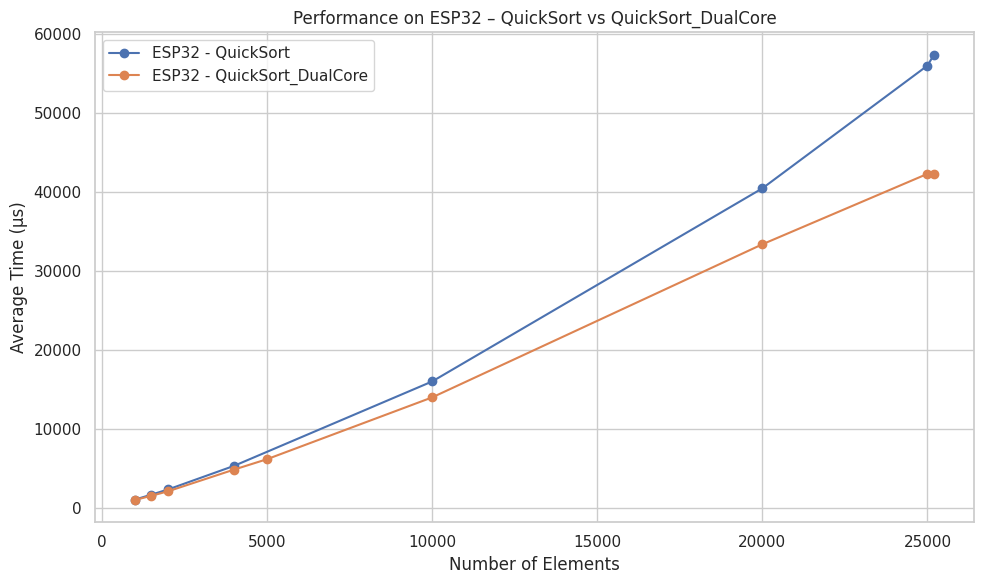

In [41]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32 and the two algorithms
df_esp32 = df[(df['Chip'] == 'ESP32') & df['Algoritmo'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32[df_esp32['Algoritmo'] == algorithm]
    data = data.groupby('N Elementos', as_index=False)['Tempo Médio (us)'].mean()
    plt.plot(data['N Elementos'], data['Tempo Médio (us)'],
             marker='o', label=f"ESP32 - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32 – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ESP32S3


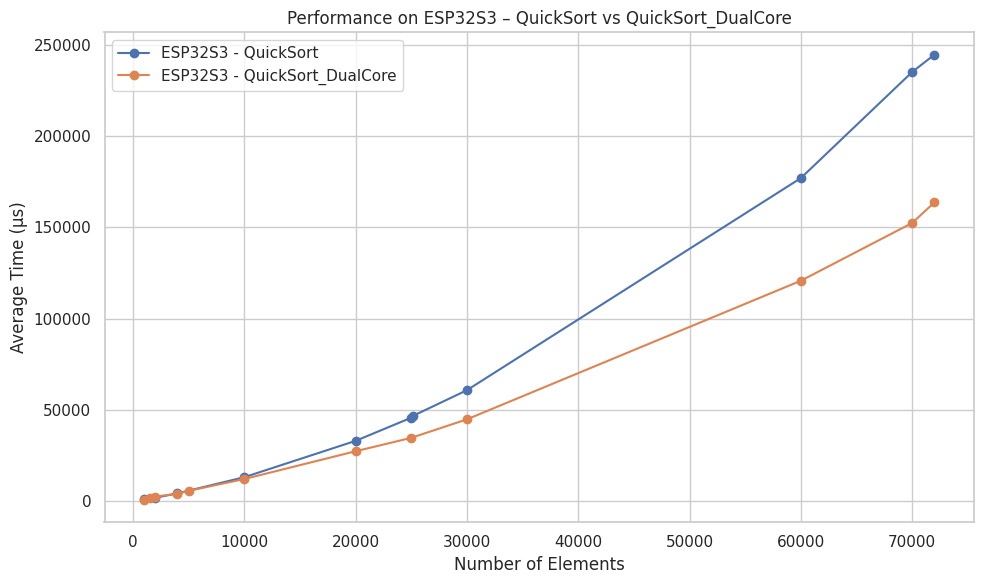

In [42]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32S3 and the two algorithms
df_esp32s3 = df[(df['Chip'] == 'ESP32S3') & df['Algoritmo'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32s3[df_esp32s3['Algoritmo'] == algorithm]
    data = data.groupby('N Elementos', as_index=False)['Tempo Médio (us)'].mean()
    plt.plot(data['N Elementos'], data['Tempo Médio (us)'],
             marker='o', label=f"ESP32S3 - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32S3 – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## All MicroControllers


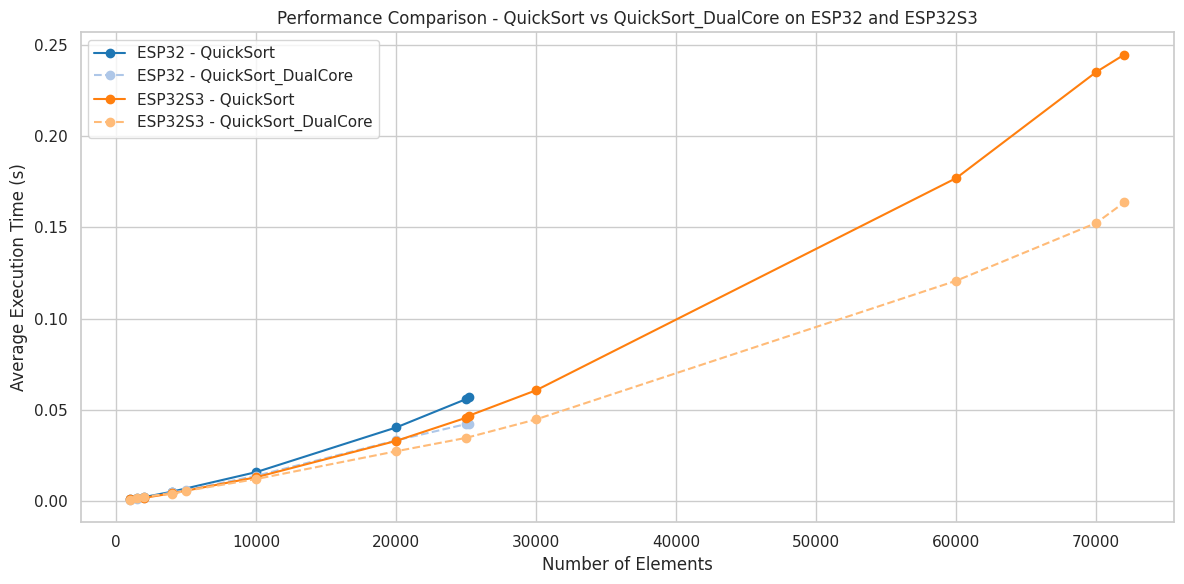

In [45]:
# In PT-BR for me 😂 sorry.

# Configurar estilo
sns.set(style="whitegrid")

# Converter microssegundos para segundos
df['Average Time (s)'] = df['Tempo Médio (us)'] / 1_000_000

# Filtrar algoritmos de interesse
algorithms = ['QuickSort', 'QuickSort_DualCore']
df_filtered = df[df['Algoritmo'].isin(algorithms)]

# Cores específicas por (Chip, Algoritmo)
color_map = {
    ('ESP32', 'QuickSort'): '#1f77b4',         # Azul escuro
    ('ESP32', 'QuickSort_DualCore'): '#aec7e8',# Azul claro
    ('ESP32S3', 'QuickSort'): '#ff7f0e',       # Laranja escuro
    ('ESP32S3', 'QuickSort_DualCore'): '#ffbb78' # Laranja claro
}

# Estilos de linha (opcional, mantemos linha cheia para todos aqui)
line_styles = {
    'QuickSort': '-',
    'QuickSort_DualCore': '--'
}

# Criar gráfico
plt.figure(figsize=(12, 6))

# Plotar com cores diferentes por chip+algoritmo
for chip in ['ESP32', 'ESP32S3']:
    for algorithm in algorithms:
        data = df_filtered[(df_filtered['Chip'] == chip) & (df_filtered['Algoritmo'] == algorithm)]
        data = data.groupby('N Elementos', as_index=False)['Average Time (s)'].mean()
        plt.plot(
            data['N Elementos'],
            data['Average Time (s)'],
            marker='o',
            label=f"{chip} - {algorithm}",
            color=color_map[(chip, algorithm)],
            linestyle=line_styles[algorithm]
        )

# Títulos e rótulos em inglês
plt.title("Performance Comparison - QuickSort vs QuickSort_DualCore on ESP32 and ESP32S3")
plt.xlabel("Number of Elements")
plt.ylabel("Average Execution Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
